# Deep Computer Vision Menggunakan Convolutional Neural Networks (CNNs)

**Penulis:** Pembelajaran Machine Learning (AI Google Gemini)

**Sumber Referensi Utama:** Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (Edisi ke-2) oleh Aurélien Géron.

Bab ini akan membahas secara mendalam Convolutional Neural Networks (CNNs), sebuah arsitektur Machine Learning yang sangat efektif untuk tugas-tugas visi komputer. Kita akan menjelajahi konsep-konsep dasar, arsitektur populer, dan implementasi praktis menggunakan TensorFlow dan Keras.

CNNs terinspirasi dari studi tentang korteks visual otak manusia dan telah menunjukkan kinerja `superhuman` dalam beberapa tugas visual yang kompleks. Mereka menjadi dasar layanan pencarian gambar, mobil swakemudi, sistem klasifikasi video otomatis, dan banyak lagi. Selain itu, CNNs tidak terbatas pada persepsi visual, tetapi juga berhasil dalam tugas-tugas lain seperti pengenalan suara dan pemrosesan bahasa alami.


## 1. Arsitektur Korteks Visual

David H. Hubel dan Torsten Wiesel melakukan serangkaian eksperimen pada kucing pada tahun 1958 dan 1959, memberikan wawasan penting tentang struktur korteks visual otak. Mereka menemukan bahwa banyak neuron di korteks visual memiliki `receptive field` lokal yang kecil, yang berarti mereka hanya merespons stimulus visual yang terletak di wilayah terbatas dari bidang visual.

Receptive field dari neuron yang berbeda dapat tumpang tindih dan bersama-sama menutupi seluruh bidang visual. Selain itu, mereka mencatat bahwa beberapa neuron hanya bereaksi terhadap gambar garis horizontal, sementara yang lain bereaksi terhadap garis dengan orientasi yang berbeda. Mereka juga mengamati bahwa beberapa neuron memiliki receptive field yang lebih besar dan bereaksi terhadap pola yang lebih kompleks yang merupakan kombinasi dari pola tingkat rendah. Observasi ini mengarah pada gagasan bahwa neuron tingkat tinggi didasarkan pada output dari neuron tingkat rendah yang berdekatan. Struktur hierarkis yang kuat ini mampu mendeteksi semua jenis pola kompleks di area mana pun dari bidang visual.

Penelitian ini menginspirasi `neocognitron` yang diperkenalkan pada tahun 1980, yang kemudian berkembang menjadi apa yang sekarang kita sebut `convolutional neural networks`.

**Mengapa tidak hanya menggunakan Jaringan Saraf Tiruan (DNN) yang sepenuhnya terhubung?**

Meskipun DNNs berfungsi dengan baik untuk gambar kecil (misalnya, MNIST), mereka tidak efektif untuk gambar yang lebih besar karena jumlah parameter yang sangat banyak. Misalnya, gambar 100 × 100 piksel memiliki 10.000 piksel. Jika lapisan pertama hanya memiliki 1.000 neuron (yang sudah sangat membatasi jumlah informasi yang dikirimkan ke lapisan berikutnya), ini berarti total 10 juta koneksi. CNNs mengatasi masalah ini dengan menggunakan lapisan yang terhubung sebagian dan `weight sharing`.


In [4]:
# Placeholder untuk visualisasi receptive field (Anda dapat mencari contoh visualisasi ini)
# import matplotlib.pyplot as plt
# import numpy as np
# (Gambarkan diagram yang menunjukkan receptive fields lokal yang tumpang tindih)
# plt.imshow(image)
# plt.title("Receptive Fields Visualisation (Conceptual)")
# plt.show()


## 2. Lapisan Konvolusional (Convolutional Layers)

Blok bangunan terpenting dari CNN adalah lapisan konvolusional. Neuron-neuron di lapisan konvolusional pertama tidak terhubung ke setiap piksel di gambar input (seperti di lapisan yang dibahas di bab sebelumnya), tetapi hanya ke piksel di `receptive field` mereka. Demikian pula, setiap neuron di lapisan konvolusional kedua hanya terhubung ke neuron yang terletak dalam persegi panjang kecil di lapisan pertama.

Arsitektur ini memungkinkan jaringan untuk berkonsentrasi pada fitur-fitur tingkat rendah yang kecil di lapisan tersembunyi pertama, kemudian mengumpulkannya menjadi fitur-fitur tingkat tinggi yang lebih besar di lapisan tersembunyi berikutnya, dan seterusnya. Struktur hierarkis ini umum dalam gambar dunia nyata, itulah salah satu alasan mengapa CNNs bekerja dengan sangat baik untuk pengenalan gambar.

**Perbedaan dari DNNs:**
Dalam CNN, setiap lapisan direpresentasikan dalam 2D, yang membuatnya lebih mudah untuk mencocokkan neuron dengan input yang sesuai.

**Padding (Zero Padding):**
Agar sebuah lapisan memiliki tinggi dan lebar yang sama dengan lapisan sebelumnya, seringkali ditambahkan nol di sekitar input. Ini disebut `zero padding`.

**Stride:**
Dimungkinkan juga untuk menghubungkan lapisan input yang besar ke lapisan yang jauh lebih kecil dengan memberikan jarak pada `receptive field`. Ini secara dramatis mengurangi kompleksitas komputasi model. Pergeseran dari satu receptive field ke receptive field berikutnya disebut `stride`.

### 2.1. Filter (Convolution Kernels)

Bobot neuron dapat direpresentasikan sebagai gambar kecil seukuran `receptive field`. Bobot ini disebut `filter` (atau `convolution kernels`).

Lapisan yang penuh dengan neuron menggunakan filter yang sama akan menghasilkan `feature map`, yang menyoroti area dalam gambar yang paling banyak mengaktifkan filter. Kita tidak perlu mendefinisikan filter secara manual; lapisan konvolusional akan secara otomatis mempelajari filter yang paling berguna untuk tugasnya selama pelatihan.

### 2.2. Menumpuk Beberapa Peta Fitur (Stacking Multiple Feature Maps)

Output dari setiap lapisan konvolusional direpresentasikan dalam 3D, karena memiliki banyak filter dan menghasilkan satu peta fitur per filter. Setiap neuron dalam peta fitur tertentu berbagi parameter yang sama (bobot dan bias), sementara neuron di peta fitur yang berbeda menggunakan parameter yang berbeda. Receptive field sebuah neuron meluas ke seluruh peta fitur lapisan sebelumnya. Singkatnya, lapisan konvolusional secara bersamaan menerapkan beberapa filter yang dapat dilatih pada inputnya, membuatnya mampu mendeteksi banyak fitur di mana pun dalam inputnya.

**Weight Sharing:**
Fakta bahwa semua neuron dalam peta fitur berbagi parameter yang sama secara dramatis mengurangi jumlah parameter dalam model. Setelah CNN belajar mengenali suatu pola di satu lokasi, ia dapat mengenalinya di lokasi lain.


### 2.3. Implementasi TensorFlow


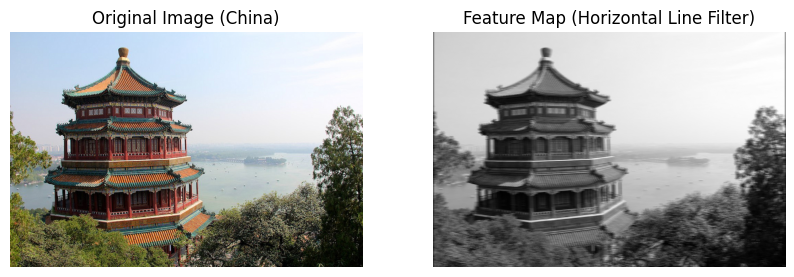

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

# Muat contoh gambar (pastikan Anda menginstal Pillow: pip install Pillow)
try:
    china = load_sample_image("china.jpg") / 255
    flower = load_sample_image("flower.jpg") / 255
except Exception as e:
    print(f"Error loading sample images: {e}. Please ensure 'Pillow' is installed and images are accessible.")
    print("You can download sample images manually or create dummy data for demonstration.")
    # Dummy data for demonstration if images fail to load
    china = np.random.rand(210, 160, 3)
    flower = np.random.rand(210, 160, 3)

images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Buat 2 filter
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # Garis vertikal
filters[3, :, :, 1] = 1 # Garis horizontal

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images[0, :, :, :])
plt.title("Original Image (China)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(outputs[0, :, :, 1], cmap="gray") # Plot peta fitur ke-2 dari gambar ke-1
plt.title("Feature Map (Horizontal Line Filter)")
plt.axis("off")
plt.show()


In [6]:
# Menggunakan keras.layers.Conv2D
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                                    padding="same", activation="relu",
                                    input_shape=[28, 28, 1])
print("\nContoh lapisan Conv2D dari Keras:")
print(conv_layer)



Contoh lapisan Conv2D dari Keras:
<Conv2D name=conv2d, built=False>


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 2.4. Kebutuhan Memori (Memory Requirements)

Lapisan konvolusional membutuhkan RAM yang sangat besar, terutama selama pelatihan, karena `backward pass` dari `backpropagation` membutuhkan semua nilai perantara yang dihitung selama `forward pass`.

**Tips jika GPU kehabisan memori:**
* Kurangi ukuran mini-batch.
* Kurangi dimensi menggunakan stride atau hapus beberapa lapisan.
* Gunakan float 16-bit sebagai ganti float 32-bit.
* Distribusikan CNN di beberapa perangkat.


## 3. Lapisan Pooling (Pooling Layers)

Lapisan pooling bertujuan untuk mensubsample (mengecilkan) gambar input untuk mengurangi beban komputasi, penggunaan memori, dan jumlah parameter (dengan demikian membatasi risiko overfitting).

Lapisan pooling terhubung ke output dari sejumlah kecil neuron di lapisan sebelumnya, yang terletak dalam receptive field persegi panjang kecil. Anda harus mendefinisikan ukurannya, stride, dan jenis padding, sama seperti sebelumnya. Namun, neuron pooling tidak memiliki bobot; ia hanya mengumpulkan input menggunakan fungsi agregasi seperti maksimum atau rata-rata. `Max pooling layer` adalah jenis lapisan pooling yang paling umum.

**Invariansi Terjemahan (Translation Invariance):**
Lapisan max pooling juga memperkenalkan beberapa tingkat invariansi terhadap terjemahan kecil. Dengan menyisipkan lapisan max pooling setiap beberapa lapisan di CNN, dimungkinkan untuk mendapatkan beberapa tingkat invariansi terjemahan pada skala yang lebih besar. Selain itu, max pooling menawarkan sedikit invariansi rotasi dan sedikit invariansi skala.

**Kelemahan Max Pooling:**
* Sangat merusak: bahkan dengan kernel 2x2 dan stride 2, output akan menjadi dua kali lebih kecil di kedua arah.
* Invariansi tidak selalu diinginkan, misalnya dalam segmentasi semantik di mana `equivariance` lebih penting.


### 3.1. Implementasi TensorFlow


In [7]:
# Implementasi Max Pooling
max_pool_layer = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid")
print("\nContoh lapisan MaxPool2D:")
print(max_pool_layer)



Contoh lapisan MaxPool2D:
<MaxPooling2D name=max_pooling2d, built=True>


In [8]:
# Implementasi Average Pooling
avg_pool_layer = tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding="valid")
print("\nContoh lapisan AveragePooling2D:")
print(avg_pool_layer)



Contoh lapisan AveragePooling2D:
<AveragePooling2D name=average_pooling2d, built=True>


In [9]:
# Depthwise Max Pooling (menggunakan tf.nn.max_pool dalam lapisan Lambda)
# Asumsi 'images' dari bagian sebelumnya tersedia atau buat dummy data jika diperlukan
try:
    # Coba gunakan 'images' dari bagian sebelumnya
    if 'images' not in locals():
        images = np.random.rand(1, 210, 160, 3) # Dummy data jika tidak ada
except NameError:
    images = np.random.rand(1, 210, 160, 3) # Dummy data jika tidak ada

depth_pool = tf.keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="valid"))
print("\nContoh Depthwise Max Pooling (Lambda Layer):")
print(depth_pool)



Contoh Depthwise Max Pooling (Lambda Layer):
<Lambda name=lambda, built=False>


In [10]:
# Global Average Pooling Layer
global_avg_pool_layer = tf.keras.layers.GlobalAveragePooling2D()
print("\nContoh lapisan GlobalAveragePooling2D:")
print(global_avg_pool_layer)



Contoh lapisan GlobalAveragePooling2D:
<GlobalAveragePooling2D name=global_average_pooling2d, built=True>


## 4. Arsitektur CNN

Arsitektur CNN yang umum menumpuk beberapa lapisan konvolusional (masing-masing umumnya diikuti oleh lapisan ReLU), kemudian lapisan pooling, kemudian beberapa lapisan konvolusional lainnya (+ReLU), kemudian lapisan pooling lainnya, dan seterusnya. Gambar menjadi semakin kecil seiring dengan kemajuan melalui jaringan, tetapi juga biasanya menjadi semakin dalam (yaitu, dengan lebih banyak peta fitur), berkat lapisan konvolusional. Di bagian atas tumpukan, ditambahkan jaringan saraf `feedforward` biasa, yang terdiri dari beberapa lapisan yang terhubung sepenuhnya (+ReLU), dan lapisan terakhir menghasilkan prediksi (misalnya, lapisan softmax yang menghasilkan estimasi probabilitas kelas).

**Kesalahan Umum:**
Kesalahan umum adalah menggunakan kernel konvolusional yang terlalu besar. Sebaiknya tumpuk dua lapisan dengan kernel 3x3 daripada menggunakan lapisan konvolusional dengan kernel 5x5: ini akan menggunakan lebih sedikit parameter dan membutuhkan lebih sedikit komputasi, dan biasanya berkinerja lebih baik. Satu pengecualian adalah untuk lapisan konvolusional pertama: ia biasanya dapat memiliki kernel besar (misalnya, 5x5), biasanya dengan stride 2 atau lebih: ini akan mengurangi dimensi spasial gambar tanpa kehilangan terlalu banyak informasi, dan karena gambar input hanya memiliki tiga saluran secara umum, itu tidak akan terlalu mahal.


**Contoh CNN Sederhana untuk Fashion MNIST:**


In [11]:
from tensorflow import keras
import numpy as np

# Muat Fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[5000:] / 255.0, X_train_full[:5000] / 255.0
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

# Menambahkan dimensi channel tunggal untuk gambar grayscale
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis] / 255.0 # Normalisasi data test juga

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,413,834 (5.39 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print("\nMelatih model sederhana untuk Fashion MNIST (mungkin butuh waktu)...")
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nLoss pada test set: {loss:.4f}")
print(f"Accuracy pada test set: {accuracy:.4f}")



Melatih model sederhana untuk Fashion MNIST (mungkin butuh waktu)...
Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 796s 461ms/step - accuracy: 0.5787 - loss: 1.1431 - val_accuracy: 0.8710 - val_loss: 0.3556
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 785s 457ms/step - accuracy: 0.8459 - loss: 0.4535 - val_accuracy: 0.8772 - val_loss: 0.3220
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 789s 449ms/step - accuracy: 0.8715 - loss: 0.3732 - val_accuracy: 0.8914 - val_loss: 0.2910
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 807s 452ms/step - accuracy: 0.8855 - loss: 0.3367 - val_accuracy: 0.9004 - val_loss: 0.2781
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 797s 450ms/step - accuracy: 0.8979 - loss: 0.3009 - val_accuracy: 0.9034 - val_loss: 0.2540
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step - accuracy: 0.8949 - loss: 0.2923

Loss pada test set: 0.2901
Accuracy pada test set: 0.8972


### 4.1. LeNet-5

Arsitektur LeNet-5 adalah salah satu arsitektur CNN yang paling dikenal. Seperti yang disebutkan sebelumnya, itu dibuat oleh Yann LeCun pada tahun 1998 dan telah banyak digunakan untuk pengenalan digit tulisan tangan (MNIST).

**Fitur utama:**
* Gambar MNIST 28 × 28 piksel, tetapi di-`zero-padded` menjadi 32 × 32 piksel dan dinormalisasi sebelum dimasukkan ke jaringan.
* Lapisan pooling rata-rata sedikit lebih kompleks dari biasanya: setiap neuron menghitung rata-rata inputnya, kemudian mengalikan hasilnya dengan koefisien yang dapat dipelajari (satu per peta) dan menambahkan bias yang dapat dipelajari (lagi, satu per peta), lalu akhirnya menerapkan fungsi aktivasi.
* Sebagian besar neuron di peta C3 terhubung ke neuron di hanya tiga atau empat peta S2 (bukan semua enam peta S2).
* Lapisan outputnya sedikit istimewa: alih-alih menghitung perkalian matriks input dan vektor bobot, setiap neuron menghasilkan kuadrat jarak Euclidean antara vektor input dan vektor bobotnya.

### 4.2. AlexNet

Arsitektur AlexNet memenangkan tantangan ImageNet ILSVRC 2012 dengan selisih yang besar: ia mencapai `top-five error rate` 17%, sementara yang terbaik kedua hanya mencapai 26%.

**Fitur utama:**
* Jauh lebih besar dan lebih dalam dari LeNet-5.
* Pertama kali menumpuk lapisan konvolusional secara langsung, alih-alih menumpuk lapisan pooling di atas setiap lapisan konvolusional.
* Menggunakan `dropout` (50% pada lapisan F9 dan F10) selama pelatihan untuk mengurangi `overfitting`.
* Melakukan `augmentasi data` dengan menggeser gambar pelatihan secara acak, membaliknya secara horizontal, dan mengubah kondisi pencahayaan.
* Menggunakan `local response normalization (LRN)` segera setelah langkah ReLU dari lapisan C1 dan C3.

### 4.3. GoogLeNet

Arsitektur GoogLeNet dikembangkan oleh Christian Szegedy dkk. dari Google Research, dan memenangkan tantangan ILSVRC 2014 dengan mendorong `top-five error rate` di bawah 7%. Kinerja hebat ini sebagian besar berasal dari fakta bahwa jaringan jauh lebih dalam daripada CNN sebelumnya, dimungkinkan oleh `inception modules`. GoogLeNet sebenarnya memiliki 10 kali lebih sedikit parameter daripada AlexNet (sekitar 6 juta dibandingkan 60 juta).

**Inception Modules:**
* Menggabungkan filter dengan ukuran kernel yang berbeda (1x1, 3x3, 5x5) dan pooling dalam satu blok.
* Lapisan konvolusional 1x1 berfungsi sebagai `bottleneck layers` untuk mengurangi dimensi, memotong biaya komputasi dan jumlah parameter, serta mempercepat pelatihan dan meningkatkan generalisasi.

### 4.4. VGGNet

Runner-up di tantangan ILSVRC 2014 adalah VGGNet, dikembangkan oleh Karen Simonyan dan Andrew Zisserman dari Visual Geometry Group (VGG) lab penelitian di Oxford University. Ini memiliki arsitektur yang sangat sederhana dan klasik, dengan 2 atau 3 lapisan konvolusional dan lapisan pooling, lalu lagi 2 atau 3 lapisan konvolusional dan lapisan pooling, dan seterusnya (mencapai total hanya 16 atau 19 lapisan konvolusional, tergantung pada varian VGG), ditambah jaringan `dense` terakhir dengan 2 lapisan tersembunyi dan lapisan output. Ia hanya menggunakan filter 3x3, tetapi banyak filter.

### 4.5. ResNet (Residual Network)

Kaiming He dkk. memenangkan tantangan ILSVRC 2015 menggunakan Residual Network (atau ResNet), yang memberikan `top-five error rate` di bawah 3.6%. Varian pemenang menggunakan CNN yang sangat dalam yang terdiri dari 152 lapisan. Kunci untuk dapat melatih jaringan sedalam itu adalah dengan menggunakan `skip connections` (juga disebut `shortcut connections`): sinyal yang masuk ke suatu lapisan juga ditambahkan ke output lapisan yang terletak sedikit lebih tinggi di tumpukan.

**Residual Learning:**
Jika Anda menambahkan input `x` ke output jaringan (yaitu, Anda menambahkan koneksi `skip`), maka jaringan akan dipaksa untuk memodelkan `f(x) = h(x) - x` daripada `h(x)`. Ini disebut `residual learning`.

### 4.6. Xception (Extreme Inception)

Varian lain dari arsitektur GoogLeNet adalah Xception (singkatan dari Extreme Inception) yang diusulkan pada tahun 2016 oleh François Chollet (penulis Keras). Ini secara signifikan mengungguli Inception-v3 pada tugas visi yang besar. Ia menggabungkan ide GoogLeNet dan ResNet, tetapi mengganti modul `inception` dengan jenis lapisan khusus yang disebut `depthwise separable convolution layer`.

### 4.7. SENet (Squeeze-and-Excitation Network)

Arsitektur pemenang di tantangan ILSVRC 2017 adalah Squeeze-and-Excitation Network (SENet). Arsitektur ini memperluas arsitektur yang ada seperti jaringan `inception` dan ResNet, dan meningkatkan kinerjanya. Peningkatan ini berasal dari fakta bahwa SENet menambahkan jaringan saraf kecil, yang disebut `SE block`, ke setiap unit dalam arsitektur asli.


## 5. Menggunakan Model yang Sudah Dilatih (Pretrained Models) dari Keras

Secara umum, Anda tidak perlu mengimplementasikan model standar seperti GoogLeNet atau ResNet secara manual, karena jaringan yang sudah dilatih siap tersedia dengan satu baris kode di paket `keras.applications`.


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Model ResNet50 berhasil dimuat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Top 3 Prediksi:


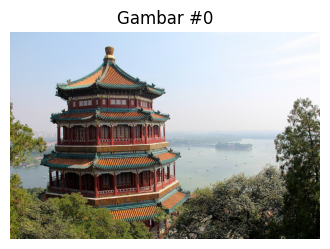

Prediksi untuk Gambar #0:
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%



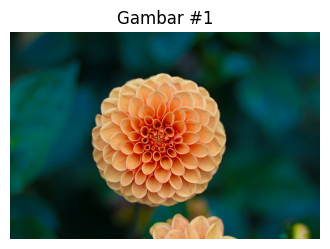

Prediksi untuk Gambar #1:
  n03530642 - honeycomb    49.81%
  n13040303 - stinkhorn    33.96%
  n02206856 - bee          4.35%



In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Muat model ResNet50 yang sudah dilatih di ImageNet
try:
    model_resnet = keras.applications.resnet50.ResNet50(weights="imagenet")
    print("\nModel ResNet50 berhasil dimuat.")
    # model_resnet.summary()
except Exception as e:
    print(f"Error loading ResNet50 model: {e}. Pastikan koneksi internet stabil.")
    model_resnet = None

if model_resnet:
    # Buat dummy images atau gunakan gambar yang ada dari bagian sebelumnya
    try:
        from sklearn.datasets import load_sample_image
        # Coba muat gambar dari sklearn.datasets
        china_image = load_sample_image("china.jpg")
        flower_image = load_sample_image("flower.jpg")
        # Normalisasi ke 0-1 untuk matplotlib, tapi preprocess_input nanti akan * 255
        images_for_display = np.array([china_image / 255., flower_image / 255.])
        images_for_model = np.array([china_image, flower_image])
    except Exception:
        images_for_model = np.random.randint(0, 256, size=(2, 224, 224, 3), dtype=np.uint8) # Dummy data jika tidak bisa load
        images_for_display = images_for_model / 255.
        print("Menggunakan dummy images karena sample images tidak dapat dimuat.")

    # Resize dan preproses gambar
    images_resized = tf.image.resize(images_for_model, [224, 224])
    inputs = keras.applications.resnet50.preprocess_input(images_resized)

    # Prediksi
    Y_proba = model_resnet.predict(inputs)

    # Dekode prediksi
    top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)

    print("\nTop 3 Prediksi:")
    for image_index in range(len(images_for_display)):
        plt.figure(figsize=(4, 4))
        plt.imshow(images_for_display[image_index])
        plt.title(f"Gambar #{image_index}")
        plt.axis("off")
        plt.show()

        print(f"Prediksi untuk Gambar #{image_index}:")
        for class_id, name, y_proba in top_K[image_index]:
            print(f"  {class_id} - {name:12s} {y_proba * 100:.2f}%")
        print()


### 5.1. Model yang Sudah Dilatih untuk Transfer Learning

Jika Anda ingin membangun `image classifier` tetapi tidak memiliki cukup data pelatihan, seringkali merupakan ide yang baik untuk menggunakan kembali lapisan bawah dari model yang sudah dilatih (seperti yang dibahas di Bab 11).


In [15]:
import tensorflow_datasets as tfds

# Muat dataset tf_flowers
try:
    dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
    dataset_size = info.splits["train"].num_examples # 3670
    class_names = info.features["label"].names # ["dandelion", "daisy", ...]
    n_classes = info.features["label"].num_classes # 5
    print(f"\nDataset tf_flowers dimuat. Jumlah contoh: {dataset_size}, Jumlah kelas: {n_classes}")

    # Split dataset
    test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])
    test_set = tfds.load("tf_flowers", split=test_split, as_supervised=True)
    valid_set = tfds.load("tf_flowers", split=valid_split, as_supervised=True)
    train_set = tfds.load("tf_flowers", split=train_split, as_supervised=True)

    # Fungsi preprocessing
    def preprocess(image, label):
        resized_image = tf.image.resize(image, [224, 224])
        final_image = keras.applications.xception.preprocess_input(resized_image)
        return final_image, label

    batch_size = 32
    train_set_processed = train_set.shuffle(1000).map(preprocess).batch(batch_size).prefetch(1)
    valid_set_processed = valid_set.map(preprocess).batch(batch_size).prefetch(1)
    test_set_processed = test_set.map(preprocess).batch(batch_size).prefetch(1)

    # Muat model Xception dasar yang sudah dilatih di ImageNet (tanpa lapisan atas)
    base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)

    # Tambahkan lapisan output Anda sendiri
    avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
    output = keras.layers.Dense(n_classes, activation="softmax")(avg)
    model_tl = keras.Model(inputs=base_model.input, outputs=output)

    # Freeze lapisan dasar
    for layer in base_model.layers:
        layer.trainable = False

    model_tl.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.2, momentum=0.9), metrics=["accuracy"])
    print("\nMelatih model transfer learning (lapisan dasar beku)...")
    history_tl_frozen = model_tl.fit(train_set_processed, epochs=5, validation_data=valid_set_processed)
except: None

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.BMNBDX_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.

Dataset tf_flowers dimuat. Jumlah contoh: 3670, Jumlah kelas: 5


In [16]:
# Unfreeze lapisan dasar untuk fine-tuning
if 'model_tl' in locals() and model_tl is not None:
    for layer in base_model.layers:
        layer.trainable = True

    # Kompilasi ulang model setelah unfreeze
    optimizer_fine_tune = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model_tl.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_fine_tune, metrics=["accuracy"])
    print("\nMelanjutkan pelatihan model transfer learning (lapisan dasar tidak beku)...")
    history_tl_fine_tune = model_tl.fit(train_set_processed, epochs=10, validation_data=valid_set_processed)

    loss_tl, accuracy_tl = model_tl.evaluate(test_set_processed)
    print(f"\nLoss model transfer learning pada test set: {loss_tl:.4f}")
    print(f"Accuracy model transfer learning pada test set: {accuracy_tl:.4f}")
else:
    print("Model transfer learning tidak dimuat atau terjadi kesalahan sebelumnya. Melewatkan fine-tuning.")


Model transfer learning tidak dimuat atau terjadi kesalahan sebelumnya. Melewatkan fine-tuning.


## 6. Klasifikasi dan Lokalisasi (Classification and Localization)

Melokalisasi objek dalam gambar dapat diekspresikan sebagai tugas regresi: untuk memprediksi `bounding box` di sekitar objek, pendekatan umum adalah memprediksi koordinat horizontal dan vertikal pusat objek, serta tinggi dan lebarnya. Ini berarti kita memiliki empat angka untuk diprediksi.

**Metrik Umum:**
Metrik yang paling umum untuk ini adalah `Intersection over Union (IoU)`: area tumpang tindih antara `bounding box` yang diprediksi dan `bounding box` target, dibagi dengan area gabungannya.


In [17]:
import tensorflow as tf
from tensorflow import keras

# Asumsikan n_classes sudah terdefinisi dari bagian sebelumnya, misal n_classes = 5
n_classes = 5 # Dummy value jika tidak ada dari sebelumnya

# Contoh model untuk klasifikasi dan lokalisasi
base_model_loc = keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg_loc = keras.layers.GlobalAveragePooling2D()(base_model_loc.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg_loc)
loc_output = keras.layers.Dense(4)(avg_loc) # 4 untuk (x_center, y_center, width, height)

model_loc = keras.Model(inputs=base_model_loc.input,
                     outputs=[class_output, loc_output])

model_loc.compile(loss=["sparse_categorical_crossentropy", "mse"],
               loss_weights=[0.8, 0.2], # tergantung pada apa yang paling Anda pedulikan
               optimizer="adam", metrics=["accuracy"])

model_loc.summary()

# Catatan: Pelatihan untuk model ini membutuhkan dataset dengan bounding box labels, yang tidak disertakan dalam tf_flowers secara default.
# Ini adalah contoh konseptual dari arsitektur.


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, None,      │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, None,      │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, None,      │          0 │ block1_conv1_bn[… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, None,      │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, None,      │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, None,      │          0 │ block1_conv2_bn[… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, None,      │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, None,      │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, None,      │          0 │ block2_sepconv1_… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, None,      │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, None,      │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, None,      │      8,192 │ block1_conv2_act… │
│                     │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, None,      │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │        512 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None,      │          0 │ block2_pool[0][0… │
│                     │ None, 128)        │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, None,      │          0 │ add[0][0]       

 Total params: 20,879,921 (79.65 MB)

 Trainable params: 20,825,393 (79.44 MB)

 Non-trainable params: 54,528 (213.00 KB)

## 7. Deteksi Objek (Object Detection)

Tugas mengklasifikasikan dan melokalisasi beberapa objek dalam gambar disebut `object detection`.

**Pendekatan Awal (Sliding Window):**
Pendekatan umum adalah mengambil CNN yang dilatih untuk mengklasifikasikan dan melokalisasi satu objek, lalu menggesernya di seluruh gambar. Pendekatan ini cukup sederhana, tetapi akan mendeteksi objek yang sama beberapa kali, sehingga dibutuhkan pasca-pemrosesan.

**Non-Max Suppression:**
Pasca-pemrosesan diperlukan untuk menghilangkan `bounding box` yang tidak perlu. Pendekatan umum untuk ini disebut `non-max suppression`.

### 7.1. Jaringan Sepenuhnya Konvolusional (Fully Convolutional Networks - FCNs)

Ide FCN pertama kali diperkenalkan pada tahun 2015 oleh Jonathan Long dkk., untuk `semantic segmentation`. Para penulis menunjukkan bahwa Anda dapat mengganti lapisan `dense` di bagian atas CNN dengan lapisan konvolusional.

**Manfaat FCN:**
* Dapat memproses gambar dengan ukuran berapa pun, karena hanya berisi lapisan konvolusional dan pooling.
* Lebih efisien karena jaringan hanya melihat gambar sekali.

### 7.2. You Only Look Once (YOLO)

YOLO adalah arsitektur deteksi objek yang sangat cepat dan akurat, diusulkan oleh Joseph Redmon dkk. pada tahun 2015.

**Fitur utama YOLOv3:**
* Menghasilkan lima `bounding box` untuk setiap sel grid, masing-masing dengan skor `objectness`.
* Memprediksi offset relatif terhadap koordinat sel grid, bukan koordinat absolut.
* Menggunakan `anchor boxes` (atau `bounding box priors`) untuk memprediksi dimensi `bounding box` yang sesuai, yang ditemukan dengan menerapkan algoritma K-Means pada tinggi dan lebar `bounding box` dataset pelatihan.
* Dilatih menggunakan gambar dengan skala yang berbeda.

**Mean Average Precision (mAP):**
Metrik yang sangat umum digunakan dalam tugas deteksi objek adalah `mean Average Precision (mAP)`. Ini adalah rata-rata `Average Precision (AP)` di semua kelas, di mana AP adalah area di bawah kurva `Precision/Recall`.


## 8. Segmentasi Semantik (Semantic Segmentation)

Dalam `semantic segmentation`, setiap piksel diklasifikasikan berdasarkan kelas objek miliknya (misalnya, jalan, mobil, pejalan kaki, bangunan, dll.). Kesulitan utama dalam tugas ini adalah bahwa ketika gambar melewati CNN biasa, mereka secara bertahap kehilangan resolusi spasialnya (karena lapisan dengan stride lebih besar dari 1).

**Lapisan Transposed Convolutional:**
Untuk meningkatkan resolusi gambar, digunakan `transposed convolutional layer` (juga disebut `deconvolution layer`, meskipun istilah ini tidak akurat secara matematis). Lapisan ini setara dengan meregangkan gambar dengan menyisipkan baris dan kolom kosong (berisi nol), kemudian melakukan konvolusi biasa.

**Skip Connections:**
Untuk memulihkan beberapa resolusi spasial yang hilang di lapisan pooling sebelumnya, ditambahkan `skip connections` dari lapisan bawah. Ini memungkinkan model untuk mendapatkan detail yang lebih halus dari lapisan yang lebih rendah.


In [18]:
import tensorflow as tf
from tensorflow import keras

# Contoh implementasi transposed convolutional layer
conv_transpose_layer = keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu")
print("\nContoh lapisan Conv2DTranspose (transposed convolutional layer):")
print(conv_transpose_layer)



Contoh lapisan Conv2DTranspose (transposed convolutional layer):
<Conv2DTranspose name=conv2d_transpose, built=False>
